---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Kenneth Peñaranda Sánchez**
- Carné: **B45198**
- Grupo: **2**

- Estudiante: **Jose Gabriel Solano Ugarte**
- Carné: **B87668**
- Grupo: **1**

- Estudiante: **Sinai Zamora Vega**
- Carné: **B88719**
- Grupo: **1/2**


# `Proyecto 5` - *Procesos M/M/s*



## Datos

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 100 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 7$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

## a) [40%] Determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.


Es importante entender en este punto que como sistema M/M/1 se considera para una cantidad por definir con la relación $ \rho = \frac{\lambda}{sv} $ por lo que se toman en este caso los datos iniciales:



> $\lambda = 7$ como la tasa de llegada de personas por minuto.

> $v=0.25$ como tasa de servicio de personas por minuto.

> La fila en el sistema durante el 95% del tiempo no debe exceder las 100 personas.



Por ende, considerando ahora los valores de $\lambda$ y de $v$ para $\rho$:
$$
\rho = \frac{7}{s\cdot 0.25}=\frac{28}{s}
$$
Entonces considerando la suma de probabilidades de estado estable en donde se toma la consideración de las 100 personas donde la consideración es que no supere el 95% del tiempo, es decir que se debe considerar menor a la condición de ruptura, por ende, que no supere el 5% (0.05); así que tomando dicha definición:
$$
P(101\; o\; más\; clientes\; en\; el\; sistema)=\sum^{\infty}_{i=101}(1-\rho)\rho_i=1-\sum^{100}_{i=0}=\rho^{101}
$$
Por lo que sustituyendo el valor obtenido de $\rho$ de la expresión anterior de estado estable:
$$
\frac{28}{s}^{101}\leq0.05 
$$
$$
\frac{s^{101}}{28^{100}}\leq\frac{1}{0.05}
$$
$$
s^{100}\leq\frac{28^{101}}{0.05} 
$$
$$
s\leq\sqrt[101]{\frac{28^{101}}{0.05}}
$$
$$
s\leq28\sqrt[101]{\frac{1}{0.05}}\approx28.84293
$$
Con esto se concluye que se debe tener al menos 29 servidores para cumplir con las condiciones de servicio para mantener menos de 100 personas en la cola el 95 % del tiempo y como prueba de esto se tiene que:
$$
\rho = \frac{7}{28.84293\cdot 0.25}=0.9707
$$
Con esto se comprueba que $\rho$ es menor que 1 por lo que cumple con la condición de estado estable requerida.

Parámetro lambda = 7.0
Parámetro nu = 7.25
Tiempo con más de 99 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 3.83 horas.


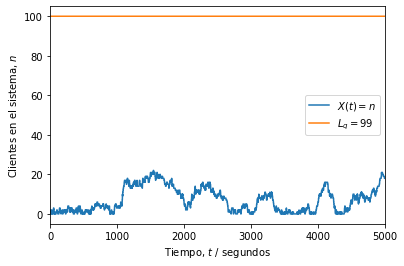

Parámetro lambda = 7.0
Parámetro nu = 8.75
Tiempo con más de 99 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 3.82 horas.


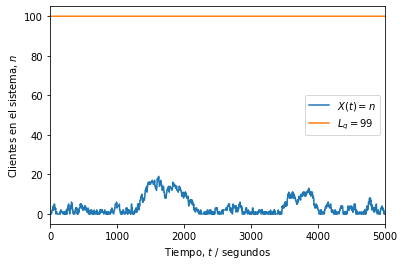

Parámetro lambda = 7.0
Parámetro nu = 6.25
Tiempo con más de 99 solicitudes en fila:
	 45.49%
	 No cumple con la especificación.
Simulación es equivalente a 4.31 horas.


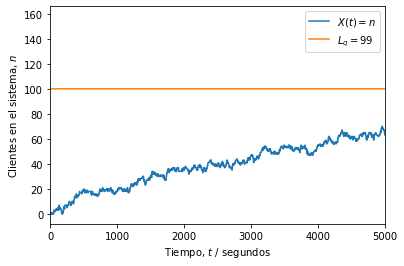

Parámetro lambda = 7.0
Parámetro nu = 0.25
Tiempo con más de 99 solicitudes en fila:
	 92.43%
	 No cumple con la especificación.
Simulación es equivalente a 95.37 horas.


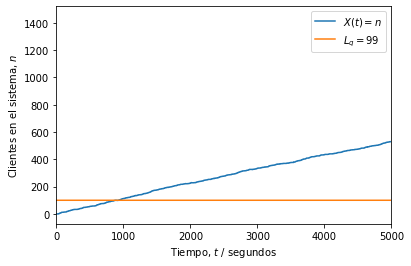

In [32]:
#Parte II

'''b) Modificar el código provisto para simular y corroborar el resultado anterior y crear
al menos dos gráficas que muestren esta simulación.'''


''' Se usará el codigo provisto en el notebook de Jupyter del enunciado, modificandolo para convertirlo en una funcion
que recibe s servidores, para de esta manera poder llamar a esta funcion para distintos casos de M/M/s, siendo el M/M/29
el caso minimo para cumplir el requisito '''

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


def proyecto(s): #funcion que recibe s servidores

    # Número de clientes
    N = 1500

    # Parámetro de llegada (clientes/segundos)
    lam = 7/60
    
    # Parámetro de servicio (servicios/segundos)
    nu = (0.25*s)/60
    
    # Distribución de los tiempos de llegada entre cada cliente
    X = stats.expon(scale = 1/lam)
    
    # Distribución de los tiempos de servicio a cada cliente
    Y = stats.expon(scale = 1/nu)
    
    # Intervalos entre llegadas (segundos desde último cliente)
    t_intervalos = np.ceil(X.rvs(N)).astype('int')
    
    # Tiempos de las llegadas (segundos desde el inicio)
    t_llegadas = [t_intervalos[0]]
    for i in range(1, len(t_intervalos)):
        siguiente = t_llegadas[i-1] + t_intervalos[i]
        t_llegadas.append(siguiente)
    
    # Tiempos de servicio (segundos desde inicio de servicio)
    t_servicio = np.ceil(Y.rvs(N)).astype('int')
    
    # Inicialización del tiempo de inicio y fin de atención
    inicio = t_llegadas[0]          # primera llegada
    fin = inicio + t_servicio[0]    # primera salida

    # Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
    t_atencion = [inicio]
    for i in range(1, N):
        inicio = np.max((t_llegadas[i], fin))
        fin = inicio + t_servicio[i]
        t_atencion.append(inicio)

    # Inicialización del vector temporal para registrar eventos
    t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

    # Asignación de eventos de llegada (+1) y salida (-1) de clientes
    for c in range(N):
        i = t_llegadas[c]
        t[i] += 1
        j = t_atencion[c] + t_servicio[c]
        t[j] -= 1
    
    # Umbral de P o más personas en sistema (hay P - 1 en fila)
    P = 101

    # Instantes (segundos) de tiempo con P o más solicitudes en sistema
    exceso = 0

    # Proceso aleatorio (estados n = {0, 1, 2...})
    Xt = np.zeros(t.shape)
    
    # Inicialización de estado n
    n = 0
    
    # Recorrido del vector temporal y conteo de clientes (estado n)
    for i, c in enumerate(t):
        n += c # sumar (+1) o restar (-1) al estado
        Xt[i] = n
        if Xt[i] >= P: 
            exceso += 1
    
    # Fracción de tiempo con P o más solicitudes en sistema
    fraccion = exceso / len(t)
    
    # Resultados
    print('Parámetro lambda =', str(lam*60))
    print('Parámetro nu =', str(nu*60))
    print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
    print('\t {:0.2f}%'.format(100*fraccion))
    if fraccion <= 0.05:
        print('\t Sí cumple con la especificación.')
    else:
        print('\t No cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

    # Gráfica de X(t) (estados del sistema)
    plt.figure()
    plt.plot(Xt)
    plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
    plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
    plt.ylabel('Clientes en el sistema, $n$')
    plt.xlabel('Tiempo, $t$ / segundos')
    plt.xlim((0, 5000))
    plt.show()

#---------------------------------------------------------------------------------------------------------    
    
'''creamos las variables de los servidores, una que son exactamente 29,
dos hacia arriba y dos hacia abajo de este valor'''

s1= 29 #los servidores que se requieren
s2= 35 #con varios servidores extra
s3= 25 #un servidor menos
s4= 1 #caso M/M/1 como el del ejemplo

#llamamos a la funcion para cada caso
proyecto(s1)
proyecto(s2)
proyecto(s3)
proyecto(s4)




## Análisis de las Simulaciones

### Cadenas de Markov

Las cadenas de Markov pueden describirse como procesos estocásticos discretos en los cuales la probabilidad de que un determinado evento de todos los posibles suceda, depende directamente del evento anterior. Es un sistema que no tiene memoria, y a esta propiedad se le conoce como **propiedad de Markov**.

A partir de su introducción en 1906 por el matemático ruso **Andréi Márkov**, el concepto ha incursionado en muchísimas aplicaciones, por ejemplo, en meteorología, se ha podido estimar modelos de caída de lluvia a través de la visión del tiempo atmosférico en una determinada región y determinar que el estado actual depende únicamente del tiempo del día anterior y no del resto de eventos acontecidos en otros momentos del estudio.

Específicamente en este caso, se utiliza la **teoría de colas** utilizando el ingreso de personas no vacunadas como la *tasa de llegada* $\lambda$ y la tasa de servicio $\nu$ como el *tiempo de servicio* que se tarda cada "servidor" en vacunar a una persona. En este caso, se requiere que no haya más de 100 personas en fila durante el 95% del tiempo, lo que determina que se necesita 29 servidores. Las simulaciones permiten aclarar esta afirmación.

## Caso con 29 Servidores




El parámetro nu = 7.25 representa 29 "servidores".
Parámetro lambda = 7.0
Parámetro nu = 7.25
Tiempo con más de 99 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 3.79 horas.


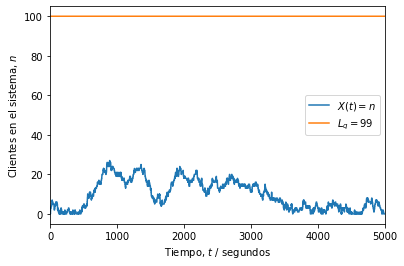

In [13]:
print('El parámetro nu = 7.25 representa 29 "servidores".')
proyecto(s1)

Inicialmente se calculó que, debido a que cada servidor puede apenas dar a basto con *0,25 personas por minuto*, es necesario establecer un $\nu$ de 7.25, el cual satisface la condición **mínima** de los 28,84293 $\approx$ 29 servidores requeridos. Se puede observar algunos picos de afluencia cercanos a los 1000 y a los 2000 segundos, sin embargo, no hay ningún momento en el que hayan más de 99 solicitudes en fila, por lo que se cumple la condición deseada.

 \
 
## Caso con 35 Servidores

El parámetro nu = 8.75 representa 35 "servidores".
Parámetro lambda = 7.0
Parámetro nu = 8.75
Tiempo con más de 99 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 3.97 horas.


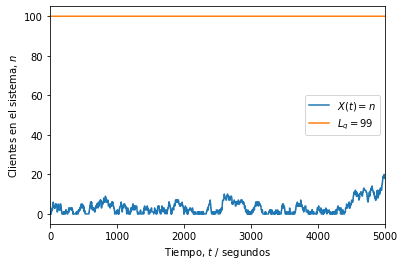

In [14]:
print('El parámetro nu = 8.75 representa 35 "servidores".')
proyecto(s2)

En comparación con el caso de los 29 servidores, los picos son menos pronunciados (puesto que los usuarios se distribuyen más debido a la mayor cantidad de "servidores). La condición se cumple satisfactoriamente, sin embargo, no es el caso **mínimo**, 29.

\

## Caso con 25 Servidores

El parámetro nu = 6.5 representa 25 "servidores".
Parámetro lambda = 7.0
Parámetro nu = 6.25
Tiempo con más de 99 solicitudes en fila:
	 54.56%
	 No cumple con la especificación.
Simulación es equivalente a 4.52 horas.


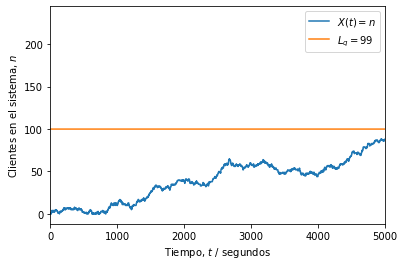

In [34]:
print('El parámetro nu = 6.5 representa 25 "servidores".')
proyecto(s3)

Al realizar la simulación con el parámetro *s3* representando a 25 servidores, queda claro que en más del 5% del tiempo se cuenta con más de 99 solicitudes en fila, lo que ya no cumple con la condición solicitada.

\

## Caso con un Único Servidor

El parámetro nu = 6.5 representa 25 "servidores".
Parámetro lambda = 7.0
Parámetro nu = 0.25
Tiempo con más de 99 solicitudes en fila:
	 93.58%
	 No cumple con la especificación.
Simulación es equivalente a 101.46 horas.


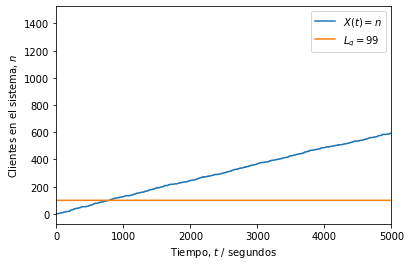

In [36]:
print('El parámetro nu = 6.5 representa 25 "servidores".')
proyecto(s4)

Finalmente para el caso de la simulación con un $\nu$ = 0.25, que es igual al mismo caso explicativo, en el que se cuenta con un único servidor, la simulación muestra como la cantidad de personas que intenta vacunarse es creciente, lo que se traduce en que casi en la totalidad del tiempo hay más de 99 personas en fila.

Estas simulaciones comprueban la utilidad de las *cadenas de Markov* para el modelado de procesos estocásticos. Como futuros ingenieros e ingenieras es de suma importancia conocer herramientas que permitan el modelado de comportamientos pues estas son particularmente útiles en el área de control de sistemas y de diseño de circuitos, tanto físicos como lógicos. Esta aplicación en estudio, particularmente, muestra la versatilidad de la herramienta y su capacidad para modelar de manera satisfactoria un fenómeno de la cotidianeidad. Resulta trascendental el aporte que esto genera para poder crear insumos de los requerimientos necesarios para llevar a cabo una campaña de vacunación.

En síntesis, con las pruebas realizadas, más allá de entender la aplicación del concepto, fue posible dimensionar la gran utilidad que las mismas representan en el área de la ingeniería y en otras muchas áreas del desarrollo actual.

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---